<a href="https://colab.research.google.com/github/marconi1964/AI4kids/blob/master/mnist_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# mnist example using Keras for less than 50 lines of codes on Google Colab
# 在 Google Colab 環境, Keras 架構下執行 mnist 的手寫數字 (0-9) 辨識的機器學習模型
# by Marconi Jiang

# make sure to install Tensorflow and Keras on Colab. Support Tensorflow 1.14 version.
# 在 Google Colab 下, 安裝 Keras 及 Tensorflow 需在最前面加 !

!pip3 install Keras
!pip3 install Tensorflow==1.14

In [2]:
# import Keras, Tensorflow, numpy and matplot
# import 需要的模組
from keras.datasets import mnist
from keras import models
from keras import layers
from keras.utils import to_categorical

from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras import Sequential

import numpy as np
import matplotlib.pyplot as plt


Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [3]:
# Set up machine learning model for training
# 設定機器模型並且訓練

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
network = models.Sequential()
network.add(layers.Dense(784, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(784, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
network = models.Sequential()
network.add(layers.Dense(784, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(784, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

network.fit(train_images, train_labels, epochs=5, batch_size=128)







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/5
60000/60000 [==============================] - 15s 245us/step - loss: 0.1988 - acc: 0.9412
Epoch 2/5
60000/60000 [==============================] - 14s 239us/step - loss: 0.0734 - acc: 0.9774
Epoch 3/5
60000/60000 [==============================] - 14s 241us/step - loss: 0.0474 - acc: 0.9845
Epoch 4/5
60000/60000 [==============================] - 14s 238us/step - loss: 0.0331 - acc: 0.9894
Epoch 5/5
60000/60000 [==============================] - 14s 237us/step - loss: 0.0279 - acc: 0.9905


In [4]:
# check accuracy and loss
# 檢查機器學習模型的正確性及誤差

test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc, 'test_loss', test_loss)

10000/10000 [==============================] - 1s 111us/step
test_acc: 0.9789 test_loss 0.07074013708714047


In [0]:
# subroutine to print the images of mnist hand-writing
# 顯示 mnist 手寫的副程式

def plot_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2,2)
    plt.imshow(image, cmap='binary')
    plt.show()


In [0]:
# user specificed ranges of test_images to compare and display. Range must be within 10000
# 學員可以設定顯示 test_images 的範圍, 介於 0 到 10000 間

item2predict = list(range(100, 110))



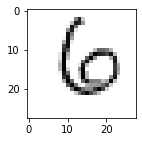

[6]


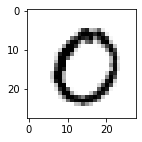

[0]


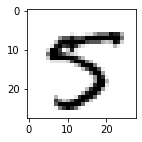

[5]


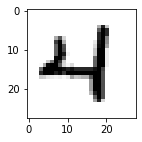

[4]


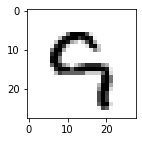

[9]


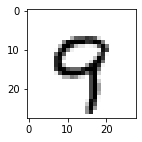

[9]


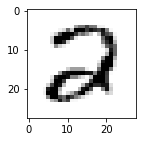

[2]


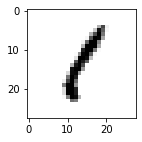

[1]


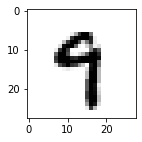

[9]


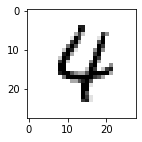

[4]


In [7]:
# display test_images and prediction of labels
# 顯示 test_images 的手寫數字, 並顯示機器學習得出模型的 label 預測

for i in item2predict:
    plot_image(test_images.reshape(10000, 28, 28)[i])

    prediction = network.predict_classes(test_images[i:i+1])
    print(prediction)